prompt


視覚的に統計学の概念を理解するための を使ったアニメーションなどの視覚化のアイデアを実装してください。(ラベル等は英語で） Python + データセットを用いた視覚化 Pythonの matplotlib や seaborn、scipy.stats を用いた視覚的なシミュレーションのアイデアを整理します。 (1) 統計学的優位差（Statistical Significance） アイデア: 平均の差のヒストグラムとp値 データセット: 2つのグループ（例：新薬グループ vs. 旧薬グループ）の効果データ 可視化: seaborn で2つのグループのヒストグラムを重ねてプロット scipy.stats.ttest_ind() で t検定 を行い、p値を表示 p値の変化を可視化するアニメーション（データ数が増えるとp値が小さくなる様子を示す） ポイント 有意水準（α = 0.05）より小さいと「統計学的に優位差あり」と判断する過程を示す

データの視覚化:

旧薬グループと新薬グループの効果データを正規分布でシミュレーション
サンプルサイズが徐々に増加するにつれて、分布の形状が変化する様子を表示
各グループの平均値を点線で表示


p値の可視化:

下部のグラフでサンプルサイズの増加に伴うp値の変化を追跡
有意水準（α = 0.05）を赤い点線で表示
統計的に有意な領域を赤色の半透明長方形でハイライト


統計的有意差の解釈:

p値が0.05未満になった時点で「統計的に有意」と判定
p値の状態に応じて、タイトルの色やテキストアノテーションが変化

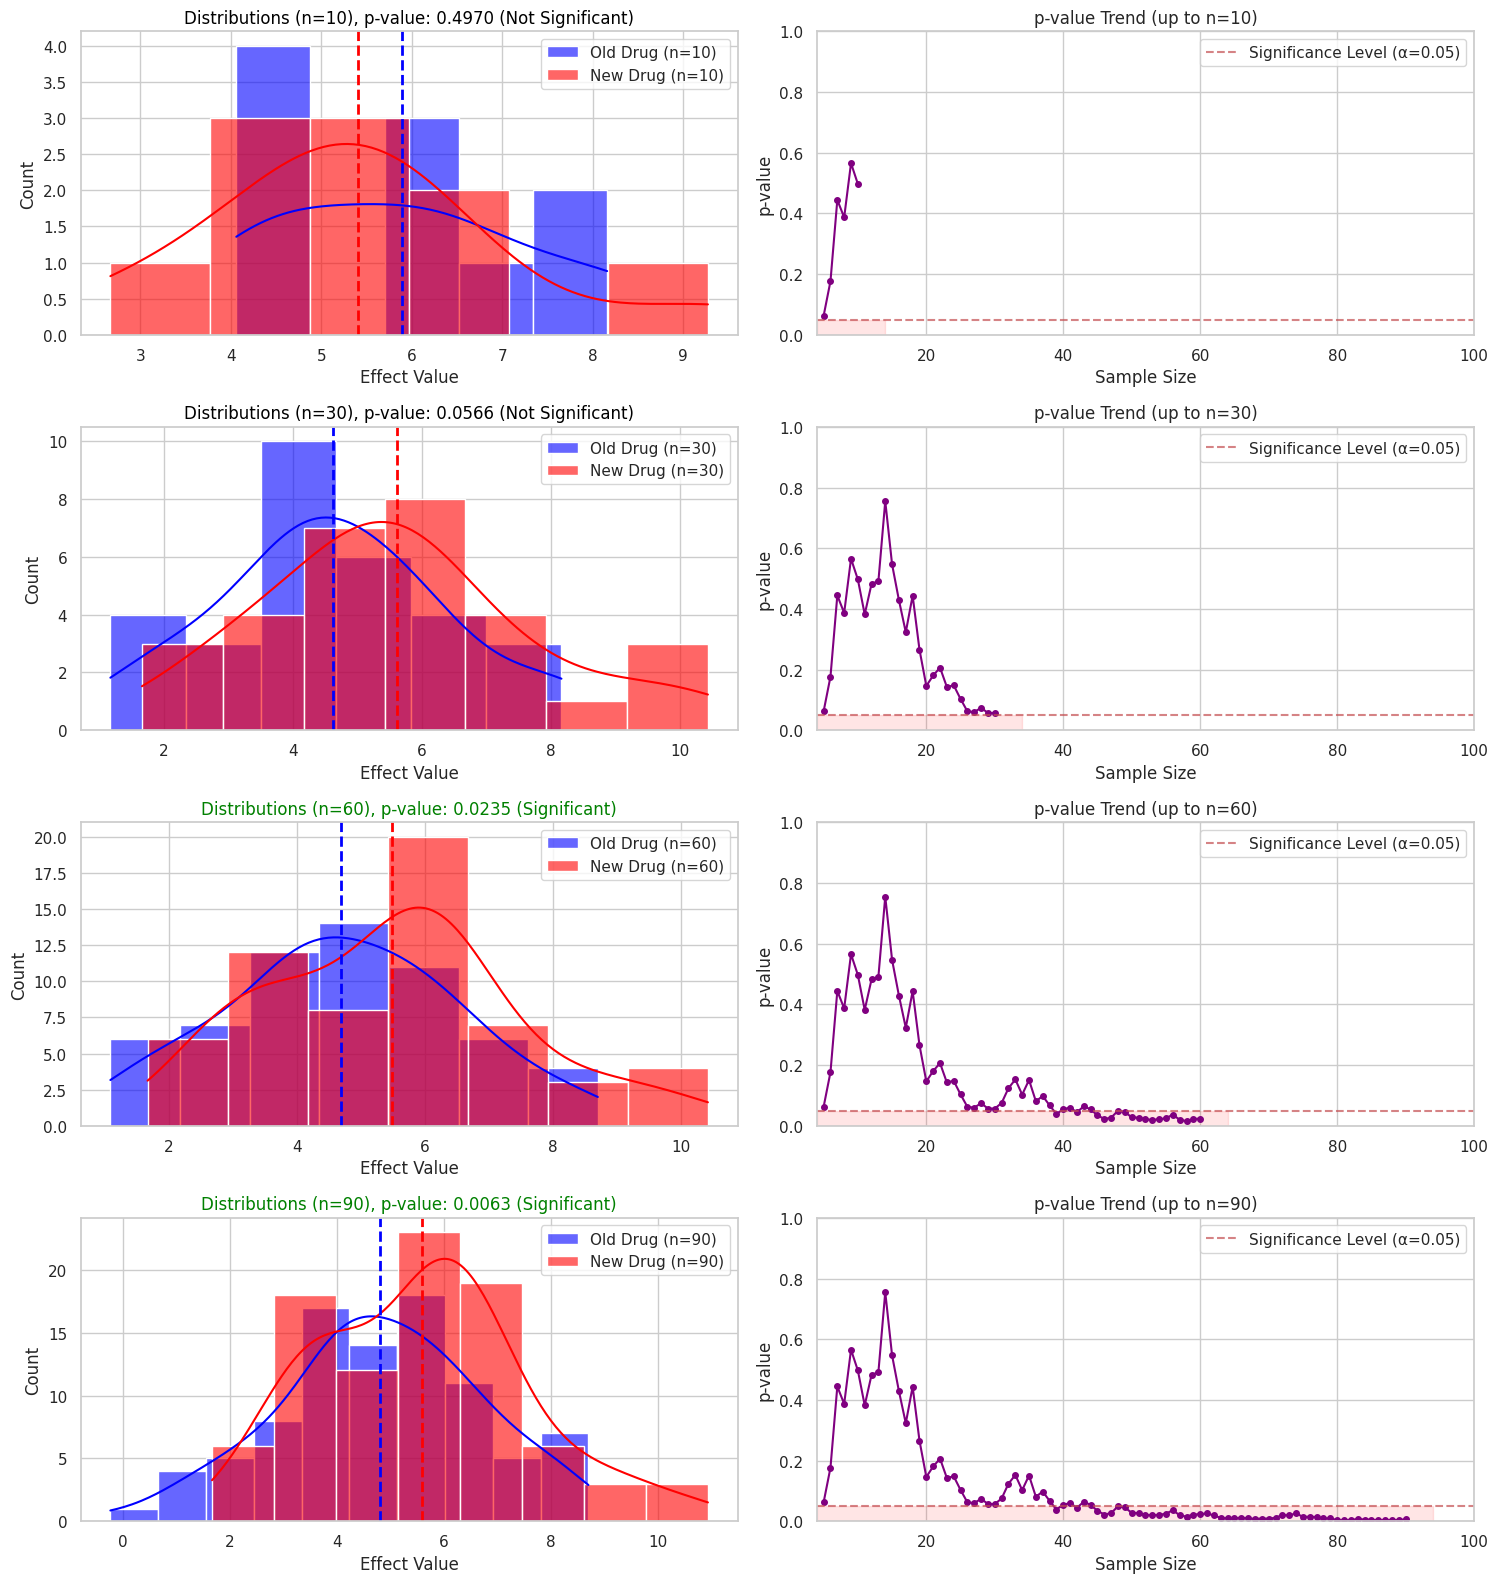

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle

# Set the style
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# Generate sample data for two groups
np.random.seed(42)
effect_size = 0.5  # Difference between groups

# Old drug group (control)
old_drug_data = np.random.normal(loc=5.0, scale=2.0, size=100)

# New drug data (slightly better effect)
new_drug_data = np.random.normal(loc=5.0 + effect_size, scale=2.0, size=100)

# Function to perform t-test and return p-value
def perform_ttest(data1, data2, n_samples):
    return stats.ttest_ind(data1[:n_samples], data2[:n_samples], equal_var=True)

# Alternative: Use static plots at specific sample sizes instead of animation
def show_static_examples():
    sample_sizes = [10, 30, 60, 90]
    fig, axes = plt.subplots(len(sample_sizes), 2, figsize=(15, 4*len(sample_sizes)))
    
    for i, n in enumerate(sample_sizes):
        # Perform t-test
        t_stat, p_value = perform_ttest(old_drug_data, new_drug_data, n)
        
        # Distribution plot
        sns.histplot(old_drug_data[:n], kde=True, color='blue', alpha=0.6, 
                     label=f"Old Drug (n={n})", ax=axes[i, 0])
        sns.histplot(new_drug_data[:n], kde=True, color='red', alpha=0.6, 
                     label=f"New Drug (n={n})", ax=axes[i, 0])
        
        # Add means
        old_mean = np.mean(old_drug_data[:n])
        new_mean = np.mean(new_drug_data[:n])
        axes[i, 0].axvline(old_mean, color='blue', linestyle='dashed', linewidth=2)
        axes[i, 0].axvline(new_mean, color='red', linestyle='dashed', linewidth=2)
        
        # Add p-value and title
        significance = "Significant" if p_value < 0.05 else "Not Significant"
        color = "green" if p_value < 0.05 else "black"
        axes[i, 0].set_title(f"Distributions (n={n}), p-value: {p_value:.4f} ({significance})", 
                             color=color)
        axes[i, 0].set_xlabel("Effect Value")
        axes[i, 0].set_ylabel("Count")
        axes[i, 0].legend()
        
        # p-value history
        sample_sizes_history = np.arange(5, n + 1)
        p_values_history = [perform_ttest(old_drug_data, new_drug_data, s)[1] for s in sample_sizes_history]
        
        axes[i, 1].plot(sample_sizes_history, p_values_history, 'o-', color='purple', markersize=4)
        axes[i, 1].axhline(y=0.05, color='r', linestyle='--', alpha=0.7, 
                           label='Significance Level (α=0.05)')
        axes[i, 1].add_patch(Rectangle((4, 0), n, 0.05, color='red', alpha=0.1))
        axes[i, 1].set_xlabel("Sample Size")
        axes[i, 1].set_ylabel("p-value")
        axes[i, 1].set_title(f"p-value Trend (up to n={n})")
        axes[i, 1].set_ylim(0, 1)
        axes[i, 1].set_xlim(4, 100)
        axes[i, 1].legend()
    
    plt.tight_layout()
    plt.show()

# Function to create and save an animation - more reliable way
def create_animation():
    # Create the figure and axes
    fig, axes = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [3, 1]})
    plt.subplots_adjust(hspace=0.3)
    
    # Function to update the plot for each frame
    def update(frame):
        n_samples = frame + 5  # Start with at least 5 samples
        
        # Clear the axes
        axes[0].clear()
        axes[1].clear()
        
        # Perform t-test with current number of samples
        t_stat, p_value = perform_ttest(old_drug_data, new_drug_data, n_samples)
        
        # Plot distributions
        ax = axes[0]
        sns.histplot(old_drug_data[:n_samples], kde=True, color='blue', alpha=0.6, 
                    label=f"Old Drug (n={n_samples})", ax=ax)
        sns.histplot(new_drug_data[:n_samples], kde=True, color='red', alpha=0.6, 
                    label=f"New Drug (n={n_samples})", ax=ax)
        
        # Calculate means
        old_mean = np.mean(old_drug_data[:n_samples])
        new_mean = np.mean(new_drug_data[:n_samples])
        
        # Add vertical lines for means
        ax.axvline(old_mean, color='blue', linestyle='dashed', linewidth=2, 
                label=f"Old Drug Mean: {old_mean:.2f}")
        ax.axvline(new_mean, color='red', linestyle='dashed', linewidth=2, 
                label=f"New Drug Mean: {new_mean:.2f}")
        
        # Add significance annotation
        significance = "Significant" if p_value < 0.05 else "Not Significant"
        color = "green" if p_value < 0.05 else "black"
        ax.set_title(f"Distribution Comparison (n={n_samples})\np-value: {p_value:.4f} ({significance})", 
                    fontsize=14, color=color)
        
        ax.set_xlabel("Effect Value")
        ax.set_ylabel("Count")
        ax.legend(loc='upper right')
        
        # Plot p-value history on the second subplot
        ax2 = axes[1]
        
        # Generate p-values for all previous sample sizes
        sample_sizes = np.arange(5, n_samples + 1)
        p_values = [perform_ttest(old_drug_data, new_drug_data, n)[1] for n in sample_sizes]
        
        # Plot p-value trend
        ax2.plot(sample_sizes, p_values, 'o-', color='purple', markersize=4)
        ax2.axhline(y=0.05, color='r', linestyle='--', alpha=0.7, label='Significance Level (α=0.05)')
        
        # Add rectangle to highlight significance area
        ax2.add_patch(Rectangle((4, 0), n_samples, 0.05, color='red', alpha=0.1))
        
        # Set axis labels and title
        ax2.set_xlabel("Sample Size")
        ax2.set_ylabel("p-value")
        ax2.set_title("p-value vs. Sample Size")
        ax2.set_ylim(0, 1)
        ax2.set_xlim(4, 100)
        ax2.legend()
        
        # Add a text annotation for the current p-value status
        if p_value < 0.05:
            ax2.text(n_samples, p_value + 0.05, 
                    f"p={p_value:.4f} < 0.05\nSignificant!",
                    color='green', fontweight='bold')
        else:
            ax2.text(n_samples, p_value + 0.05, 
                    f"p={p_value:.4f} > 0.05\nNot Significant",
                    color='black')
    
    # Create animation
    frames = 95  # Animation frames (corresponding to increasing sample size from 5 to 100)
    anim = FuncAnimation(fig, update, frames=frames, interval=200, blit=False)
    
    # Save animation as a GIF - this is the most reliable way to create the animation
    anim.save('statistical_significance.gif', writer='pillow', fps=5)
    
    plt.close(fig)  # Close the figure after saving
    print("Animation saved as 'statistical_significance.gif'")

# Execute the static example visualization
show_static_examples()

# Uncomment the line below to generate and save the animation as a GIF
# create_animation()